In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/5afe3a5d42b38481b70dabe64b4bb6b20e174423/laptop_data.csv')
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Droping unnamed column

In [12]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Converting dtype (object/string) --> float/int

In [15]:
df['Ram']=df.Ram.str.replace('GB', '')

In [19]:
df['Weight']=df.Weight.str.replace('kg','')

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [24]:
df['Ram']=df.Ram.astype(int)

In [25]:
df['Ram'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: Ram
Non-Null Count  Dtype
--------------  -----
1303 non-null   int32
dtypes: int32(1)
memory usage: 5.2 KB


In [28]:
df['Weight']=df.Weight.astype(float)

In [29]:
df.Weight.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
1303 non-null   float64
dtypes: float64(1)
memory usage: 10.3 KB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  weight            1303 non-null   float64
dtypes: float64(4), int32(1), object(7)
memory usage: 117.2+ KB


## DATA ANALYSIS 
### Data vizualization

In [31]:
import seaborn as sns

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

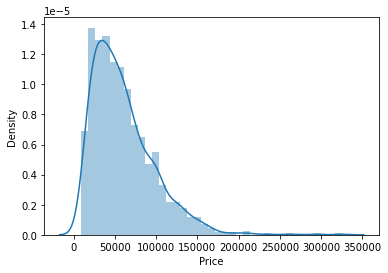

In [32]:
sns.distplot(df.Price)

In [35]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<AxesSubplot:>

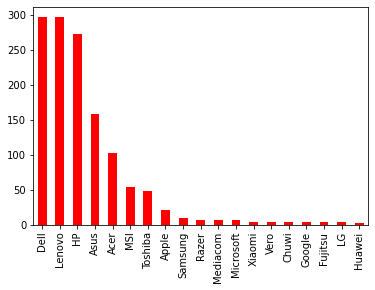

In [39]:
df.Company.value_counts().plot(kind='bar', color='r')

In [46]:
import matplotlib.pyplot as plt

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


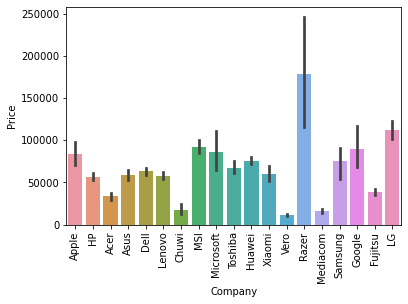

In [47]:
sns.barplot(df.Company, df.Price)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

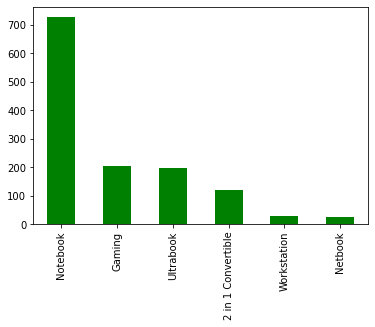

In [48]:
df.TypeName.value_counts().plot(kind='bar', color='g')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


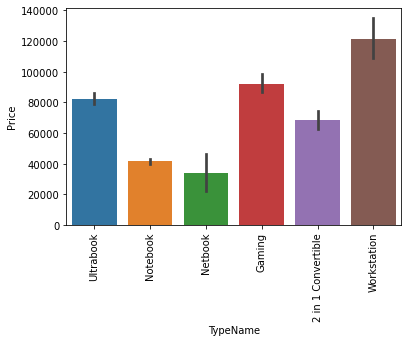

In [49]:
sns.barplot(df.TypeName, df.Price)
plt.xticks(rotation='vertical')
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

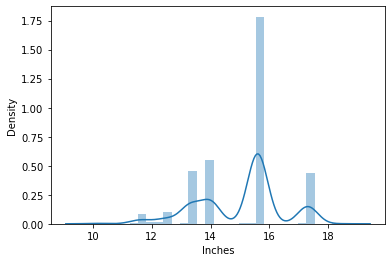

In [50]:
sns.distplot(df.Inches)

In [52]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### yaha se ek new column jisme screen, touch (Y/N)

### Python basics

In [59]:
mul= lambda x,y : x*y

In [60]:
mul(2,7)

14

In [61]:
str.upper('Pathan')

'PATHAN'

In [62]:
def col(x):
    if x=='Touchscreen':
        return 1
    else:
        return 0

## Feature Engineering

In [69]:
 df['ScreenResolution']=df.ScreenResolution.apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [71]:
df['Touchscreen']=df['ScreenResolution']

In [75]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [76]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,weight,Touchscreen
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1.37,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1.34,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1.86,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1.83,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1.37,0


In [78]:
df1=pd.read_csv('https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/5afe3a5d42b38481b70dabe64b4bb6b20e174423/laptop_data.csv')

In [79]:
df1.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [80]:
df['ScreenResolution']=df1['ScreenResolution']

In [81]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,weight,Touchscreen,ScreenResolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1.37,0,IPS Panel Retina Display 2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1.34,0,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1.86,0,Full HD 1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1.83,0,IPS Panel Retina Display 2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1.37,0,IPS Panel Retina Display 2560x1600


<AxesSubplot:>

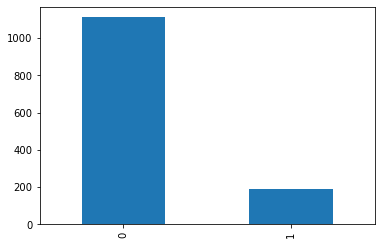

In [82]:
df['Touchscreen'].value_counts().plot(kind='bar')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

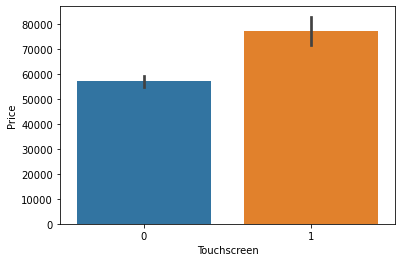

In [83]:
sns.barplot(df.Touchscreen, df.Price)

In [85]:
df['IPS']=df.ScreenResolution.apply(lambda x: 1 if 'IPS' in x else 0 )

### Play with lambda

In [138]:
df_test=pd.DataFrame({'Name':['Virat ka Kohli Ind','Rishab ka Pant Ind','KL ka Rahul Ind','Rohit ka Sharma MI'],
                    'Runs':[10000,4000,5000,8000]})

In [139]:
df_test

,Name,Runs
0,Virat ka Kohli Ind,10000
1,Rishab ka Pant Ind,4000
2,KL ka Rahul Ind,5000
3,Rohit ka Sharma MI,8000


In [148]:
df_spit = df_test.Name.str.split('ka',expand=True)

In [149]:
df_spit

,0,1
0,Virat,Kohli Ind
1,Rishab,Pant Ind
2,KL,Rahul Ind
3,Rohit,Sharma MI


### apne Ind ko alag column mai lke aana

In [116]:
df_test['Country']=df_test.Name.apply(lambda x: 'INDIA' if 'Ind' in x else 'NA')

In [117]:
df_test

,Name,Runs,Country
0,Virat Kohli Ind,10000,INDIA
1,Rishab Pant Ind,4000,INDIA
2,KL Rahul Ind,5000,INDIA
3,Rohit Sharma MI,8000,NA


In [119]:
df_test['continent']=df_test.Name.apply(lambda Name: 'Asia' if 'Ind' in Name else 'Mumbai')

### Back to our dataframe

In [122]:
df.sample(7)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,weight,Touchscreen,ScreenResolution,IPS
1003,HP,Notebook,14.0,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.64,41505.1200,1.64,0,1366x768,0
30,Chuwi,Notebook,15.6,Intel Atom x5-Z8300 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,13053.0672,1.89,0,Full HD 1920x1080,0
175,Dell,Notebook,15.6,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,2.30,0,1366x768,0
517,Asus,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,24,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24,158135.0400,2.24,0,Full HD 1920x1080,0
168,Acer,Notebook,17.3,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,45501.1200,3.00,0,IPS Panel Full HD 1920x1080,1
679,Acer,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,16,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,69210.7200,2.50,0,Full HD 1920x1080,0
306,HP,2 in 1 Convertible,13.3,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,105228.0000,1.28,1,Full HD / Touchscreen 1920x1080,0


In [123]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

<AxesSubplot:>

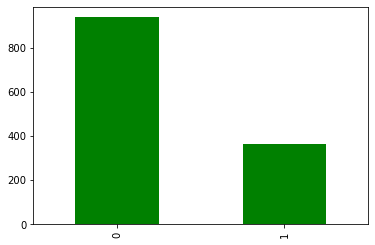

In [124]:
df['IPS'].value_counts().plot(kind='bar', color='g')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='Price'>

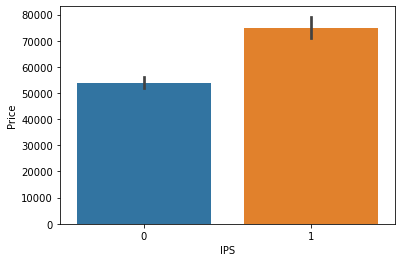

In [126]:
sns.barplot(df.IPS, df.Price)

In [150]:
new=df['ScreenResolution'].str.split('x', n=10, expand=True)

In [151]:
df['x_res']=new[0]
df['y_res']=new[1]

In [152]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,weight,Touchscreen,ScreenResolution,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1.37,0,IPS Panel Retina Display 2560x1600,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1.34,0,1440x900,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1.86,0,Full HD 1920x1080,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1.83,0,IPS Panel Retina Display 2880x1800,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1.37,0,IPS Panel Retina Display 2560x1600,1,IPS Panel Retina Display 2560,1600


### basics of Regular exp

In [153]:
import re

In [156]:
text='ram ka number is 8954 hai'

In [157]:
pattern='\d{4}'
re.findall(pattern,text)

['8954']

## Regular expression

In [160]:
df['x_res']=df['x_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [161]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,weight,Touchscreen,ScreenResolution,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1.37,0,IPS Panel Retina Display 2560x1600,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1.34,0,1440x900,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1.86,0,Full HD 1920x1080,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1.83,0,IPS Panel Retina Display 2880x1800,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1.37,0,IPS Panel Retina Display 2560x1600,1,2560,1600


In [162]:
df['x_res']=df.x_res.astype(int)
df['y_res']=df.y_res.astype(int)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   Cpu               1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  weight            1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  ScreenResolution  1303 non-null   object 
 13  IPS               1303 non-null   int64  
 14  x_res             1303 non-null   int32  
 15  y_res             1303 non-null   int32  
dtypes: float64(4), int32(3), int64(2), object(